# 데이터 전처리
## 결측치
### 결측치 탐색
- df.info()
- df.isnull().sum()
- df.isna().sum()


In [ ]:
import seaborn as sns
import pandas as pd

iris_data = sns.load_dataset("iris")
iris_data.info()

print(iris_data.isnull().sum())
print(iris_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### 결측치 처리
#### 결측치 포함 행 제거
- df.dropna(how='any')

#### 결측치 채우기
- df.fillna(0, inplace=True)

#### 결측치 변경
- df.replace(np.nan, 0)

## 중복값 처리
### 중복 데이터 확인
- df[df.duplicated()]

### 중복 데이터 제거
- df2 = df.drop.duplicates()



In [ ]:
iris_data = sns.load_dataset("iris")
iris_data[iris_data.duplicated()]

iris_data_removedup = iris_data.drop_duplicates()

## 이상치
### 이상치 탐색
#### 기초 통계량 사용
- df.describe()

In [ ]:
iris_data = sns.load_dataset("iris")
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 정렬
- df.sort_values(by=['column_name', ], ascending = False)


In [ ]:
iris_data = sns.load_dataset("iris")
iris_data.sort_values(by = ['petal_length', ], ascending = False)

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
131,7.9,3.8,6.4,2.0,virginica
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,setosa
35,5.0,3.2,1.2,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
13,4.3,3.0,1.1,0.1,setosa


#### 시각화
- plt.scatter(x = x, y = y)
  <br>plt.show()

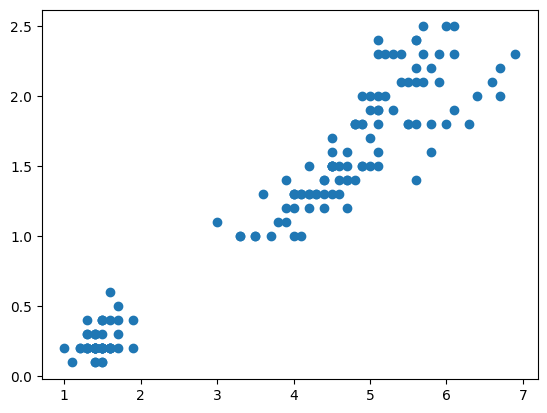

In [ ]:
import matplotlib.pyplot as plt

iris_data = sns.load_dataset("iris")

plt.scatter(x = iris_data['petal_length'], y = iris_data['petal_width'])
plt.show()

##### boxplot


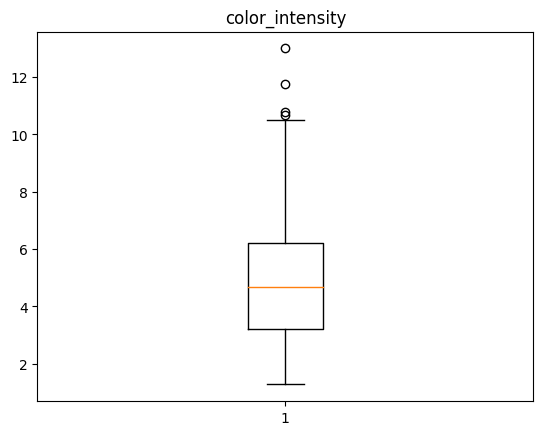

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0',1:'class_1',2:'class_2'})

plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

#### IQR 공식
사분범위 (interquartile range, IQR)

In [ ]:
import numpy as np

Q1, Q3 = np.percentile(wine['color_intensity'], [25,75])
IQR = Q3 - Q1
upper_whis = Q3 + 1.5*IQR
lower_whis = Q1 - 1.5*IQR

outliers = wine['color_intensity'][(wine['color_intensity'] > upper_whis)|(wine['color_intensity'] < lower_whis)]
print(outliers)
print(outliers.index)

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64
Index([151, 158, 159, 166], dtype='int64')


### 이상치 처리
#### 이상치 제거
- df.drop(index = outliers.index)

In [ ]:
drop_outliers = wine.drop(index=outliers.index)
print('outliers :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

outliers : (178, 14)
Drop outliers : (174, 14)


#### 이상치 대체


In [ ]:
wine.loc[outliers.index, 'color_intensity'] = wine['color_intensity'].dropna().mean()
wine.loc[outliers.index, 'color_intensity']

151    5.05809
158    5.05809
159    5.05809
166    5.05809
Name: color_intensity, dtype: float64